In [18]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Load the traffic data

traffic_df = pd.read_csv("traffic.csv")

# Display the first few rows of the dataframe

print("First few rows of the traffic data:")
traffic_df.head()

First few rows of the traffic data:


event        date       country      city  \
0  click  2021-08-21  Saudi Arabia    Jeddah   
1  click  2021-08-21  Saudi Arabia    Jeddah   
2  click  2021-08-21         India  Ludhiana   
3  click  2021-08-21        France   Unknown   
4  click  2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby   
1                             Tesher    Jalebi Baby    Jalebi Baby   
2                      Reyanna Maria      So Pretty      So Pretty   
3  Simone & Simaria, Sebastian Yatra  No Llores Más  No Llores Más   
4                             Tesher    Jalebi Baby    Jalebi Baby   

           isrc                                linkid  
0  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
1  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
2  USUM72100871  23199824-9cf5-4b98-942a-34965c3b0cc2  
3  BRUM72003904  35573248-4e49-47c7-af80-08a960fa74cd  
4  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8

In [13]:
# Display the structure of the dataframe

print("\nStructure of the traffic data:")
traffic_df.info()


Structure of the traffic data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [ ]:
# Data Cleaning

traffic_df['city'].fillna('Unknown', inplace=True)
traffic_df['country'].fillna('Unknown', inplace=True)
traffic_df['artist'].fillna('Unknown Artist', inplace=True)
traffic_df = traffic_df[~traffic_df['track'].isnull()]
traffic_df = traffic_df[~traffic_df['date'].isnull()]



C:\Users\risha\AppData\Local\Temp\ipykernel_15004\498296482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_df['city'].fillna('Unknown', inplace=True)
C:\Users\risha\AppData\Local\Temp\ipykernel_15004\498296482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [ ]:
# Display the structure of the dataframe after cleaning

print("\nStructure of the cleaned traffic data:")
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226273 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226273 non-null  object
 1   date     226273 non-null  object
 2   country  226273 non-null  object
 3   city     226273 non-null  object
 4   artist   226273 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226273 non-null  object
dtypes: object(9)
memory usage: 17.3+ MB


<Figure size 1000x600 with 0 Axes>

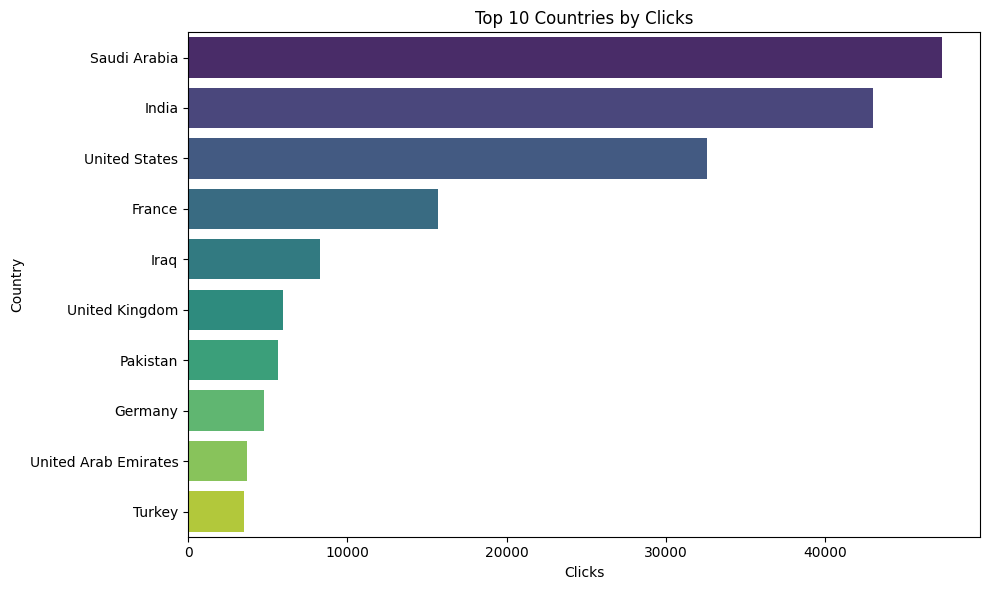

In [ ]:
# Visualizing the top 10 countries by clicks

plt.figure(figsize=(10,6))
top_countries = traffic_df['country'].value_counts().head(10)
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['country', 'clicks']

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_countries_df,
    x='clicks',
    y='country',
    hue='country',          
    palette='viridis',
    legend=False            
)
plt.title('Top 10 Countries by Clicks')
plt.xlabel('Clicks')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\risha\AppData\Local\Temp\ipykernel_15004\2062078411.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


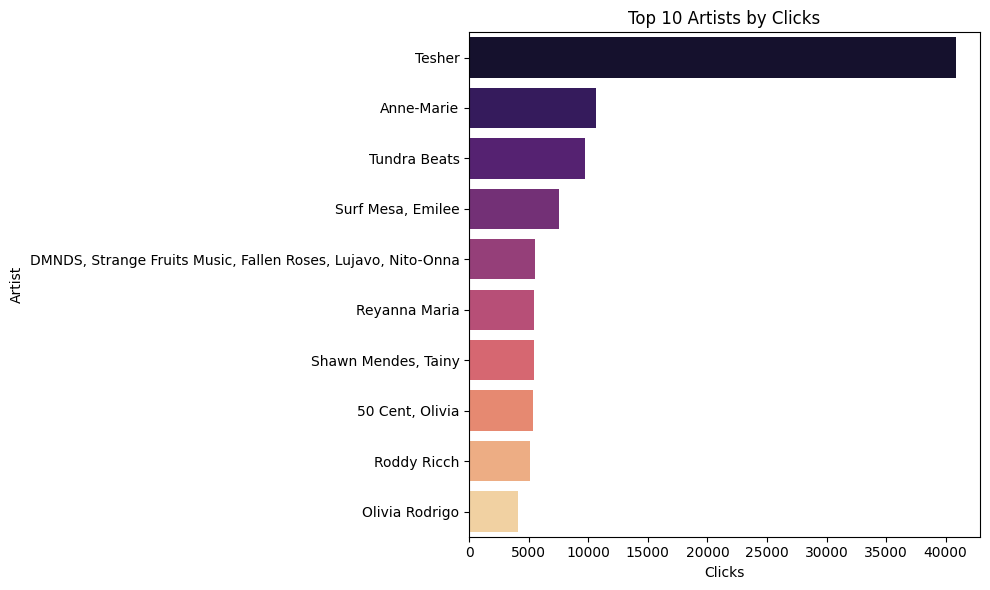

In [ ]:
# Top 10 Artists by Clicks
top_artists = traffic_df['artist'].value_counts().head(10)
top_artists_df = top_artists.reset_index()
top_artists_df.columns = ['artist', 'clicks']

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_artists_df,
    x='clicks',
    y='artist',
    palette='magma'
)
plt.title('Top 10 Artists by Clicks')
plt.xlabel('Clicks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


C:\Users\risha\AppData\Local\Temp\ipykernel_15004\1171835035.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  traffic_df['date'] = pd.to_datetime(traffic_df['date'], dayfirst=True)


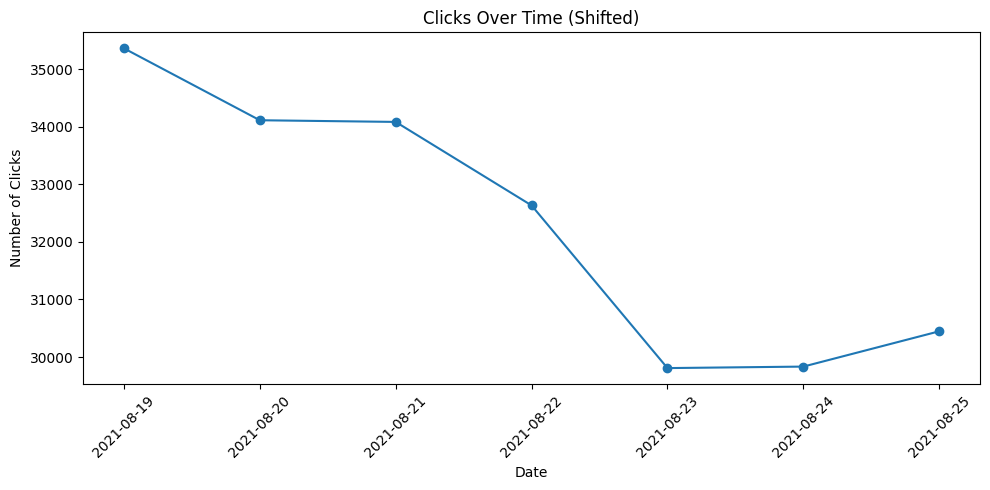

In [ ]:
# Visualizing Clicks Over Time

traffic_df['date'] = pd.to_datetime(traffic_df['date'], dayfirst=True)

date_clicks = traffic_df.groupby('date').size()

shifted_dates = date_clicks.index
click_counts = date_clicks.values

plt.figure(figsize=(10, 5))
plt.plot(shifted_dates, click_counts, marker='o', linestyle='-')

plt.title('Clicks Over Time (Shifted)')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


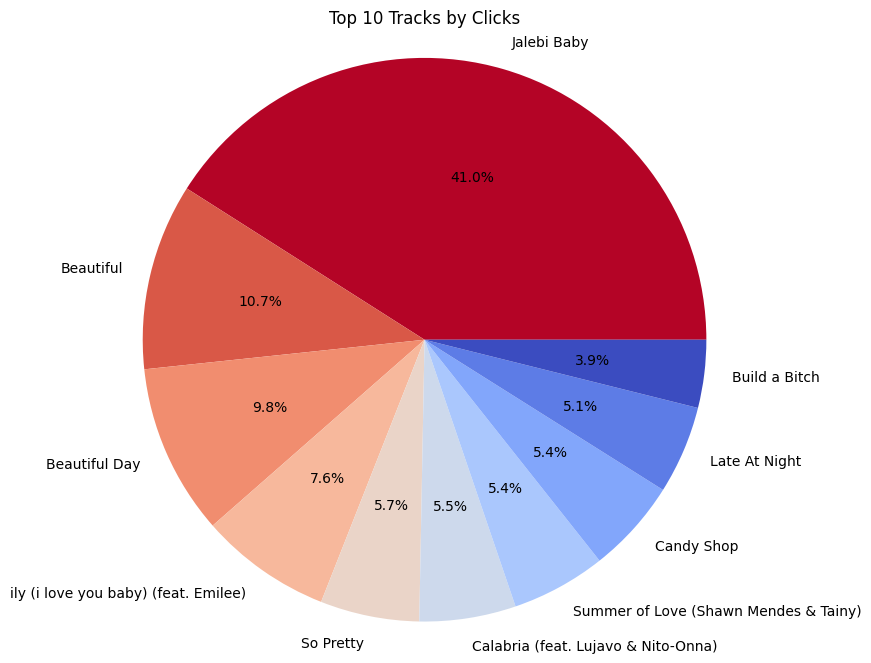

In [17]:
# Visualizing Unique Tracks 

top_tracks = traffic_df['track'].value_counts().head(10)

# Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_tracks.values,
    labels=top_tracks.index,
    autopct='%1.1f%%',        
    colors=plt.cm.coolwarm_r(np.linspace(0, 1, len(top_tracks)))
)

plt.title('Top 10 Tracks by Clicks')
plt.axis('equal')
plt.show()


C:\Users\risha\AppData\Local\Temp\ipykernel_15004\3280694036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_tracks.values, y=unique_tracks.index, palette='cubehelix')


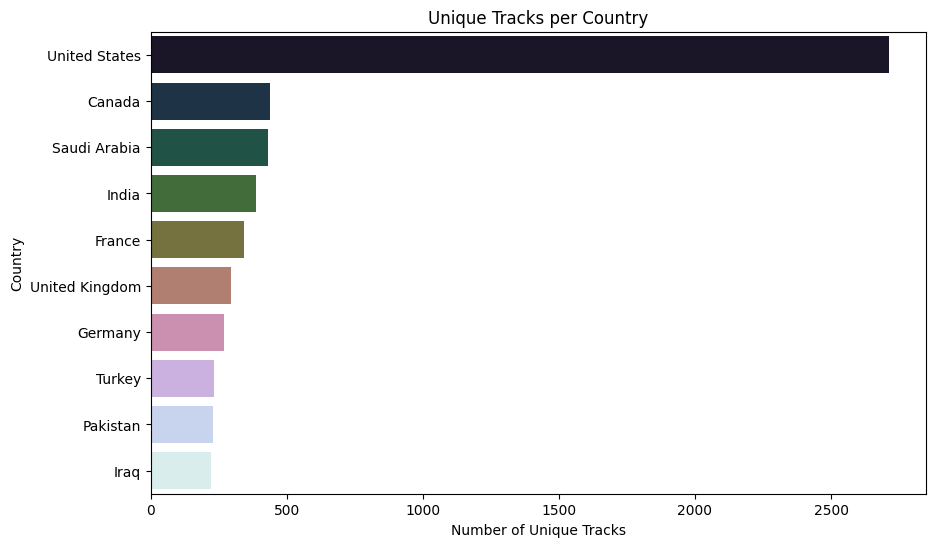

In [ ]:
# Visualizing Unique Tracks per Country

unique_tracks = traffic_df.groupby('country')['track'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=unique_tracks.values, y=unique_tracks.index, palette='cubehelix')
plt.title('Unique Tracks per Country')
plt.xlabel('Number of Unique Tracks')
plt.ylabel('Country')
plt.show()